In [126]:
import pandas as pd
import numpy as np
import altair as alt
import requests
import networkx as nx


## Scrape Eurovision vote data

In [17]:
proper_names = ["Albania", "Armenia", "Australia", "Austria", 
                "Azerbaijan", "Belarus", "Belgium", "Bulgaria", 
                "Croatia", "Cyprus", "Czech Republic", "Denmark", 
                "Estonia", "F.Y.R. Macedonia", "Finland", "France", 
                "Georgia", "Germany", "Greece", "Hungary", 
                "Iceland", "Ireland", "Israel", "Italy", "Latvia", 
                "Lithuania", "Malta", "Moldova", "Montenegro", 
                "Norway", "Poland", "Portugal", "Romania", 
                "Russia", "San Marino", "Serbia", "Slovenia", 
                "Spain", "Sweden", "Switzerland", "The Netherlands", 
                "Ukraine", "United Kingdom"]

countries = ["albania", "armenia", "australia", "austria", 
             "azerbaijan", "belarus", "belgium", "bulgaria", 
             "croatia", "cyprus", "czech-republic", "denmark", 
             "estonia", "fyr-macedonia", "finland", "france", 
             "georgia", "germany", "greece", "hungary", 
             "iceland", "ireland", "israel", "italy", "latvia", 
             "lithuania", "malta", "moldova", "montenegro", 
             "norway", "poland", "portugal", "romania", 
             "russia", "san-marino", "serbia", "slovenia", 
             "spain", "sweden", "switzerland", "the-netherlands", 
             "ukraine", "united-kingdom"]

In [13]:
url = 'https://eurovision.tv/event/lisbon-2018/grand-final/voting-details/'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

dfs = []

for c in countries:
    r = requests.get(url+c, headers=header)
    dfs.extend(pd.read_html(r.text, match='Participants'))

## Append to on DataFrame

In [66]:

def to_numeric(df):
    '''
    Turn timedelta columns into numeric dtype
    '''
    cols = ['A', 'B', 'C', 'D', 'E', 'Jury rank', 'Jury points',
           'Televoting rank', 'Televoting points']
    numeric = df[cols].apply(pd.to_numeric, errors='coerce')
    df = df.copy()
    df[cols] = numeric
    return df

df = (pd.concat(dfs, keys=proper_names)
             .pipe(to_numeric))

## Calculate "antisemitism"

In [127]:
(df[['Participants', 'A', 'B', 'C', 'D', 'E']][df.Participants=='Israel']
 .assign(jury_avg_rank = lambda x: (x.A+x.B+x.C+x.D+x.E)/5)
 .assign(Antisemitism = lambda x: x.jury_avg_rank.rank(ascending=False))
 .reset_index()[['level_0', 'jury_avg_rank', 'Antisemitism']]
 .rename(columns={'level_0': 'Country', 'jury_avg_rank': 'Jury Average Ranking'}).set_index('Country')
 .sort_values(by='Antisemitism')
)

,Jury Average Ranking,Antisemitism
Country,,
Estonia,20.4,1.0
Poland,20.0,2.0
Belarus,17.2,3.0
Norway,16.0,4.0
Montenegro,15.6,5.0
Slovenia,15.4,6.0
Latvia,14.8,7.0
F.Y.R. Macedonia,13.8,8.0
Romania,13.0,9.0


In [128]:
(df[['Participants', 'A', 'B', 'C', 'D', 'E']][df.Participants=='Israel']
 .assign(jury_avg_rank = lambda x: (x.A+x.B+x.C+x.D+x.E)/5)
 .assign(Antisemitism = lambda x: x.jury_avg_rank.rank(ascending=False, method='min'))
 .reset_index()[['level_0', 'jury_avg_rank', 'Antisemitism', 'A', 'B', 'C', 'D', 'E']]
 .rename(columns={'level_0': 'Country', 'jury_avg_rank': 'Jury Average Ranking'}).set_index('Country'))

,Jury Average Ranking,Antisemitism,A,B,C,D,E
Country,,,,,,,
Albania,5.4,30.0,6.0,8.0,4.0,6.0,3.0
Armenia,3.0,36.0,2.0,3.0,3.0,4.0,3.0
Australia,7.0,24.0,9.0,8.0,10.0,4.0,4.0
Austria,2.2,41.0,4.0,1.0,1.0,3.0,2.0
Azerbaijan,11.4,12.0,11.0,10.0,12.0,12.0,12.0
Belarus,17.2,3.0,23.0,16.0,10.0,14.0,23.0
Belgium,6.8,26.0,5.0,8.0,11.0,5.0,5.0
Bulgaria,7.0,24.0,6.0,8.0,10.0,7.0,4.0
Croatia,7.4,21.0,6.0,3.0,3.0,3.0,22.0


In [120]:
(df[['Participants', 'A', 'B', 'C', 'D', 'E']][df.Participants=='Israel']
 .assign(jury_avg_rank = lambda x: (x.A+x.B+x.C+x.D+x.E)/5)
 .assign(Antisemitism = lambda x: x.jury_avg_rank.rank(ascending=False))
 .reset_index()[['level_0', 'jury_avg_rank', 'Antisemitism']]
 .rename(columns={'level_0': 'Country', 'jury_avg_rank': 'Jury Average Ranking'}).set_index('Country')
).to_csv('eurovision/antisemite.csv')

In [101]:
df.to_csv('eurovision/all.csv')

## Create adjacency matrix for graph stuff

In [99]:
def get_adj(df, weight_col, reindex=True):
    adj = (df.reset_index()[['level_0', 'Participants', weight_col]]
              .rename(columns={'level_0': 'from', 'Participants': 'to', weight_col: 'weight'})
              .pivot(index='from', columns='to', values='weight')
              )
    if reindex:
        adj = adj.reindex(labels=proper_names, axis=1)
    return adj

In [91]:
jury_ranks = get_adj(df, 'Jury rank')
jury_points = get_adj(df, 'Jury points')
tele = get_adj(df, 'Televoting points')


In [92]:
G = nx.from_pandas_adjacency(tele.fillna(0))
nx.write_gexf(G, 'eurovision/euro18_tele_points.gexf')

In [96]:
clean_names = dict(zip(proper_names, [c.replace(' ', '_').replace('.', '') for c in proper_names]))
clean_names

{'Albania': 'Albania',
 'Armenia': 'Armenia',
 'Australia': 'Australia',
 'Austria': 'Austria',
 'Azerbaijan': 'Azerbaijan',
 'Belarus': 'Belarus',
 'Belgium': 'Belgium',
 'Bulgaria': 'Bulgaria',
 'Croatia': 'Croatia',
 'Cyprus': 'Cyprus',
 'Czech Republic': 'Czech_Republic',
 'Denmark': 'Denmark',
 'Estonia': 'Estonia',
 'F.Y.R. Macedonia': 'FYR_Macedonia',
 'Finland': 'Finland',
 'France': 'France',
 'Georgia': 'Georgia',
 'Germany': 'Germany',
 'Greece': 'Greece',
 'Hungary': 'Hungary',
 'Iceland': 'Iceland',
 'Ireland': 'Ireland',
 'Israel': 'Israel',
 'Italy': 'Italy',
 'Latvia': 'Latvia',
 'Lithuania': 'Lithuania',
 'Malta': 'Malta',
 'Moldova': 'Moldova',
 'Montenegro': 'Montenegro',
 'Norway': 'Norway',
 'Poland': 'Poland',
 'Portugal': 'Portugal',
 'Romania': 'Romania',
 'Russia': 'Russia',
 'San Marino': 'San_Marino',
 'Serbia': 'Serbia',
 'Slovenia': 'Slovenia',
 'Spain': 'Spain',
 'Sweden': 'Sweden',
 'Switzerland': 'Switzerland',
 'The Netherlands': 'The_Netherlands',
 'Uk

In [97]:
tele.fillna('-').rename(columns=clean_names, index=clean_names).to_csv('eurovision/tele_circ.csv', sep='\t')

In [98]:
jury_points.fillna('-').rename(columns=clean_names, index=clean_names).to_csv('eurovision/jury_circ.csv', sep='\t')

In [100]:
tele_circ = get_adj(df, 'Televoting points', reindex=False)
jury_circ = get_adj(df, 'Jury points', reindex=False)
tele_circ.fillna('-').rename(columns=clean_names, index=clean_names).to_csv('eurovision/tele_circ.csv', sep='\t')
jury_circ.fillna('-').rename(columns=clean_names, index=clean_names).to_csv('eurovision/jury_circ.csv', sep='\t')

## Datashader (at last!)

In [130]:
import datashader as ds
import datashader.transfer_functions as tf
from datashader.layout import random_layout, circular_layout, forceatlas2_layout
from datashader.bundling import connect_edges, hammer_bundle

from itertools import chain

In [131]:
nodes = pd.DataFrame(proper_names, columns=['name'])
nodes.tail()

,name
38,Sweden
39,Switzerland
40,The Netherlands
41,Ukraine
42,United Kingdom


In [156]:
pd.Categorical(nodes.name).cat.codes

AttributeError: 'Categorical' object has no attribute 'cat'

In [157]:
weight_col = 'Televoting points'
edges = (df.reset_index()[['level_0', 'Participants', weight_col]]
         .rename(columns={'level_0': 'source', 'Participants': 'target', weight_col: 'weight'})
         .dropna()
         .assign(source=lambda x: pd.Categorical(x['source'], categories=proper_names).codes)
         .assign(target=lambda x: pd.Categorical(x['target'], categories=proper_names).codes)
         )


In [158]:
forcedirected = forceatlas2_layout(nodes, edges)
circular  = circular_layout(nodes, uniform=False)

Wall time: 84.7 ms


ForceAtlas2 layout

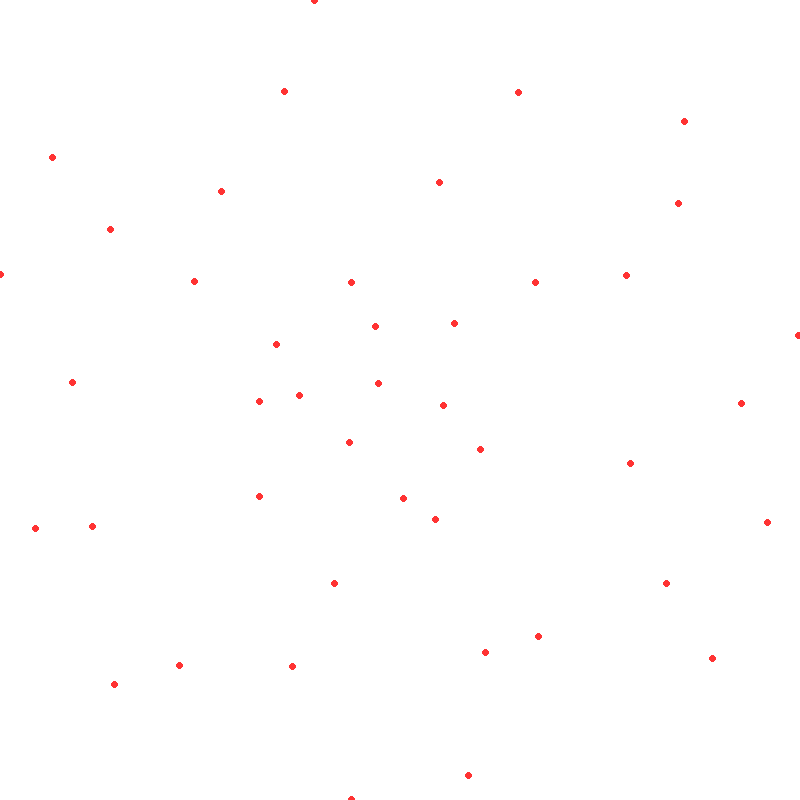

In [160]:
cvsopts = dict(plot_height=800, plot_width=800)

def nodesplot(nodes, name=None, canvas=None, cat=None):
    canvas = ds.Canvas(**cvsopts) if canvas is None else canvas
    aggregator=None if cat is None else ds.count_cat(cat)
    agg=canvas.points(nodes,'x','y',aggregator)
    return tf.spread(tf.shade(agg, cmap=["#FF3333"]), px=3, name=name)

%time forcedirected = forceatlas2_layout(nodes, edges)
tf.Images(nodesplot(forcedirected, "ForceAtlas2 layout"))

In [161]:
def edgesplot(edges, name=None, canvas=None):
    canvas = ds.Canvas(**cvsopts) if canvas is None else canvas
    return tf.shade(canvas.line(edges, 'x','y', agg=ds.count()), name=name)
    
def graphplot(nodes, edges, name="", canvas=None, cat=None):
    if canvas is None:
        xr = nodes.x.min(), nodes.x.max()
        yr = nodes.y.min(), nodes.y.max()
        canvas = ds.Canvas(**cvsopts, x_range=xr, y_range=yr)
        
    np = nodesplot(nodes, name + " nodes", canvas, cat)
    ep = edgesplot(edges, name + " edges", canvas)
    return tf.stack(ep, np, how="over", name=name)

Wall time: 1.74 s
Wall time: 847 ms
Wall time: 3.59 s
Wall time: 1.55 s


Circular layout,Force-directed
"Circular layout, bundled","Force-directed, bundled"

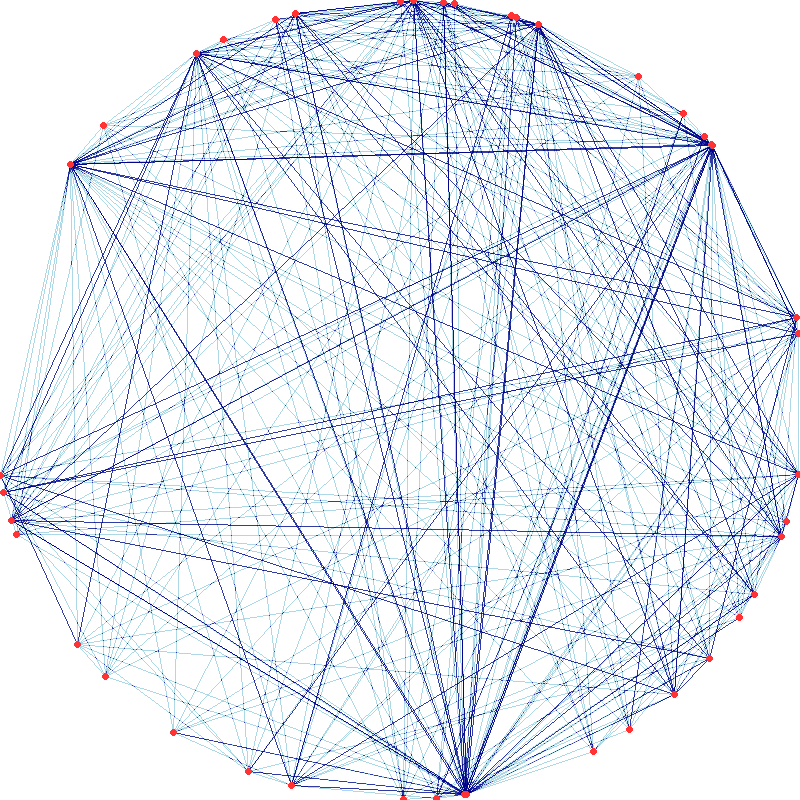
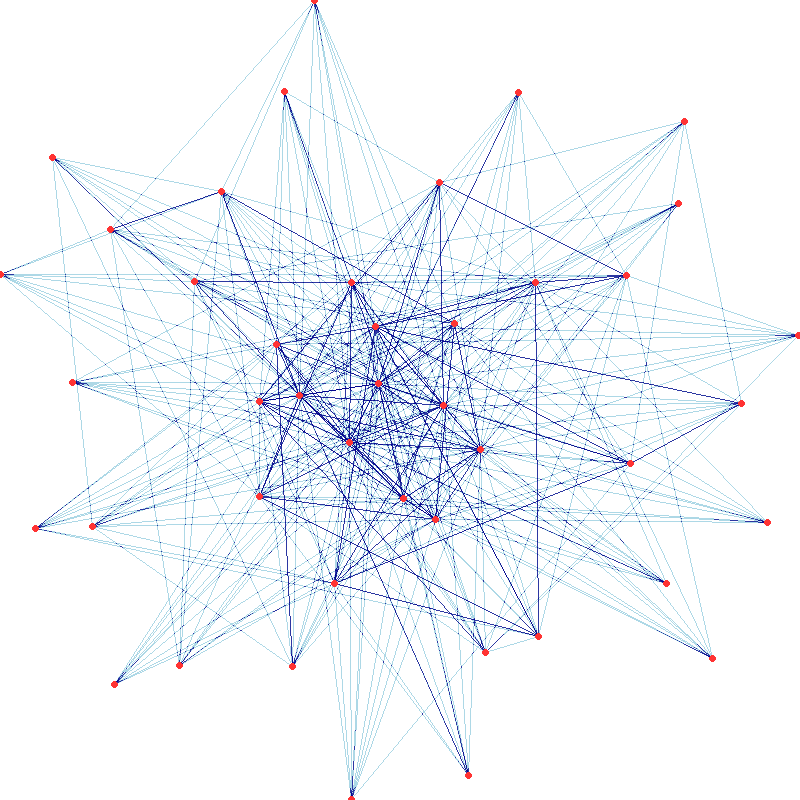
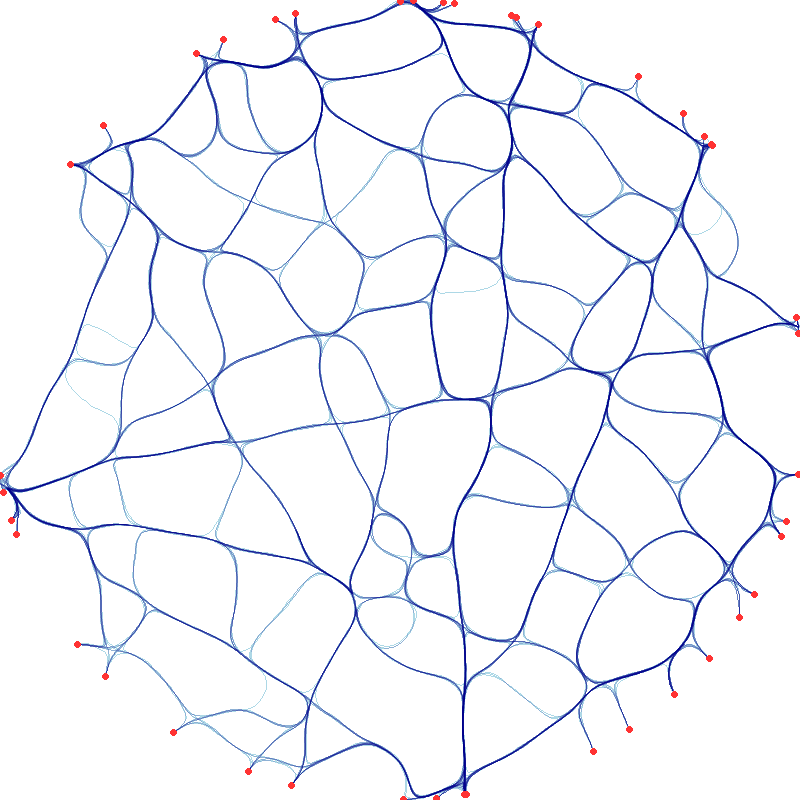
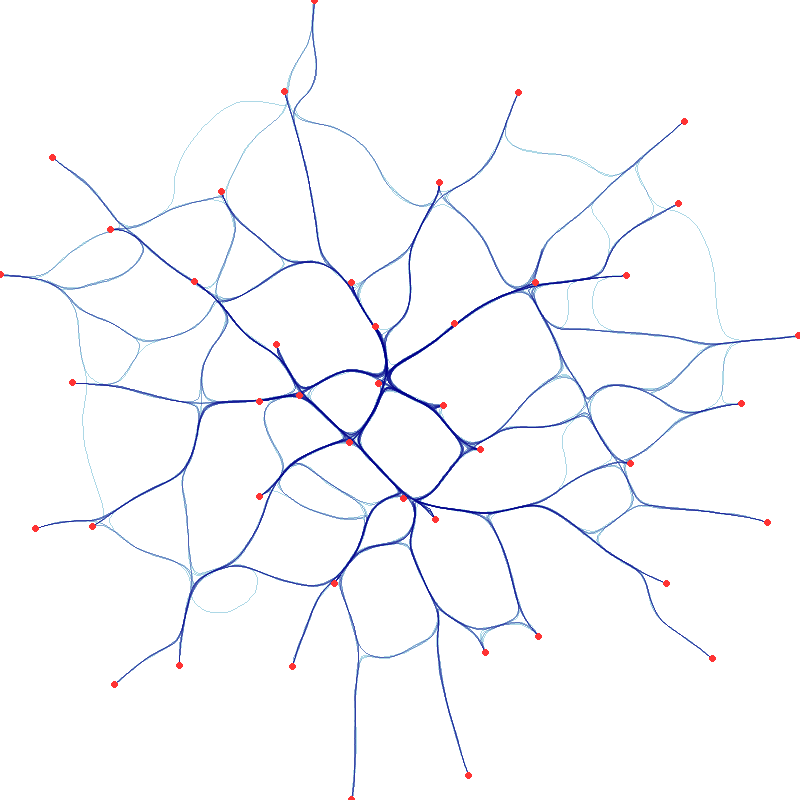

In [162]:
cd = circular
fd = forcedirected

%time cd_d = graphplot(cd, connect_edges(cd,edges), "Circular layout")
%time fd_d = graphplot(fd, connect_edges(fd,edges), "Force-directed") 
%time cd_b = graphplot(cd, hammer_bundle(cd,edges), "Circular layout, bundled")
%time fd_b = graphplot(fd, hammer_bundle(fd,edges), "Force-directed, bundled") 

tf.Images(cd_d,fd_d,cd_b,fd_b).cols(2)

TODO: [HoloViews](http://holoviews.org/user_guide/Network_Graphs.html)